<a href="https://colab.research.google.com/github/solee328/LikeLion_EDA/blob/tituschoi/COVID19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID19_EDA.ipynb
Description   : 코로나19로 인한 소상공인 점포 흥망성쇠 분석<br>
Date : 2021.04.06 ~ 2021.04.09<br>
Author : 곽희원, 김아현, 박민춘, 이현지, 최디도 

#1. 도입
지금 전 세계는 코로나19가 세계적으로 펜데믹 상태에 빠져 손씻기, 기침, 사회적 거리두기 등의 방법을 통해 헤쳐나가고 있다. 그중 사회 전반에 걸쳐 지지대 역할을 하고 있는 소상공인은 코로나 19 영향으로 폐업과 업종 축소를 하고 있다는 것은 뉴스에서 심심치않게 확인할 수 있는 이슈이다. 2020년 4월 9일 소상공인연합회가 전국 소상공 업체 1392개사를 토대로 실시한 조사 결과 99.5%인 1385개사는 코로나 19사태가 6개월 지속될 경우 경영 상황이 악화될 것이라고 답했다. 73%인 997개 소상공 업체들은 6개월 뒤에도 지금의 사태가 지속되면 폐업을 면치 못할 것이라고 답했다. 본 사안에 대해 '흥망성쇠'팀은 코로나19로 인한 확진자 현황, 정책, 사회 전반에 걸친 이동 자료, 배달앱 사용 횟수 자료 등을 분석하여 실제 폐업과 코로나가 영향을 주었는지, 앞으로 어떤 방향으로 시장이 변할지 분석해보기로 한다.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# 필요 라이브러리 로드
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime
from matplotlib import rcParams
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta, date

# 2. 거리두기 효과 확인

## 2.1. 코로나19 현황  
코로나19가 점차 유행함에 따라 국내에서의 관련 확진, 격리해제, 사망 수에 대해 촉각을 곤두세우고 있다. 따라서 매일 업데이트 되는 해당 데이터를 분석하고자 하였으며, 시각화를 통해 우리나라에 코로나19 대유행 시기가 언제였는지, 이후에 진행된 정부의 방역 정책에 의해 효과가 있었는지 확인하고자 한다.

In [ ]:
# 데이터 로드
time = pd.read_csv('/content/Time.csv')

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       102 non-null    object
 1   time       102 non-null    int64 
 2   test       102 non-null    int64 
 3   negative   102 non-null    int64 
 4   confirmed  102 non-null    int64 
 5   released   102 non-null    int64 
 6   deceased   102 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.7+ KB


위의 'Time.csv' 파일의 정보에 따르면 약 100개의 데이터, 즉 약 3달간의 데이터를 보유하고 있음을 확인할 수 있다. 우리는 보다 큰 범위의 최신화된 코로나19의 현황을 살펴보고자 케글에서 관련 데이터 셋을 확보해 이를 분석하기로 하였다.


In [ ]:
# 데이터 로드
time_series = pd.read_csv('/content/time-series-19-covid-KR.csv')

In [ ]:
# 전부 한국에 관한 데이터이므로, 국가 관련 열을 삭제
time_series = time_series.drop('Country/Region',axis = 1)

In [ ]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       439 non-null    object
 1   Confirmed  439 non-null    int64 
 2   Recovered  439 non-null    int64 
 3   Deaths     439 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.8+ KB


In [ ]:
# 확진자를 기준으로 회복율 / 사망율 추가
time_series_ratio = time_series.assign(RatioOfRecovered = lambda x :(x['Recovered']/x['Confirmed'])*100,
                          RatioOfDeaths = lambda x :(x['Deaths']/x['Confirmed'])*100)
time_series_ratio

,Date,Confirmed,Recovered,Deaths,RatioOfRecovered,RatioOfDeaths
0,2020-01-22,1,0,0,0.000000,0.000000
1,2020-01-23,1,0,0,0.000000,0.000000
2,2020-01-24,2,0,0,0.000000,0.000000
3,2020-01-25,2,0,0,0.000000,0.000000
4,2020-01-26,3,0,0,0.000000,0.000000
...,...,...,...,...,...,...
434,2021-03-31,103639,95439,1735,92.087921,1.674080
435,2021-04-01,104194,95861,1737,92.002419,1.667083
436,2021-04-02,104736,96196,1740,91.846166,1.661320
437,2021-04-03,105279,96589,1744,91.745742,1.656551


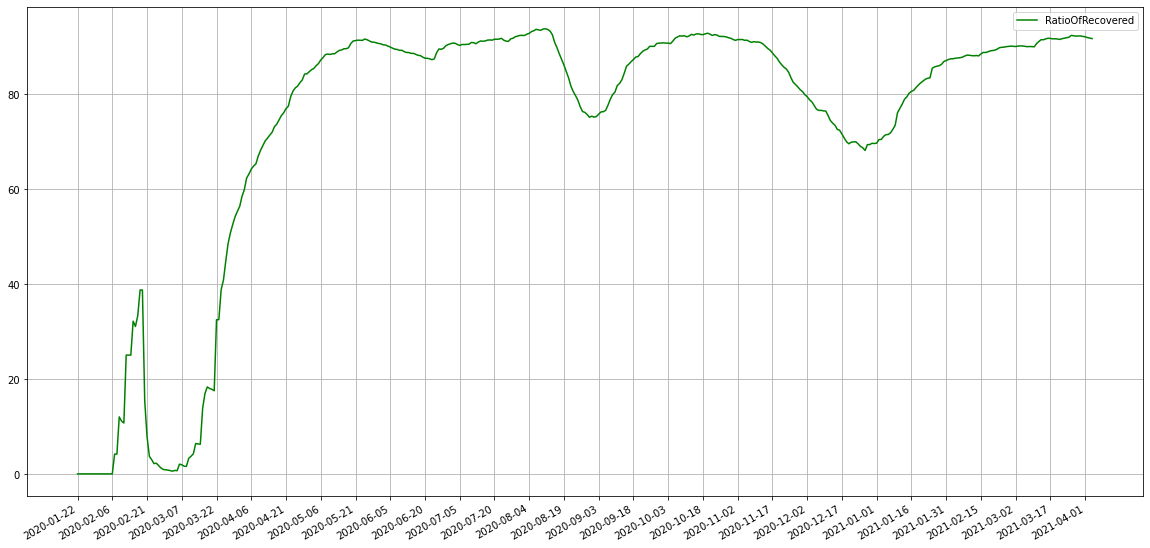

In [ ]:
# 회복율에 관한 그래프
fig, axes3 = plt.subplots(figsize = (20,10))
axes3.plot(time_series_ratio['Date'],time_series_ratio['RatioOfRecovered'],color = 'green', label = 'RatioOfRecovered')
axes3.legend()
axes3.grid(True)
plt.xticks(np.arange(0,438,15))
fig.autofmt_xdate()
plt.show()

* Ratio Of Recovered  
확진자 대비 회복율에 대한 그래프다.  
위의 그래프로 보아, 20년 2월 말, 20년 9월 초, 20년 12월 부분에서 큰 폭으로 감소했음을 확인할 수 있다.  
이는 우리나라에서 발생한 대유행시기와 일치하고 있음을 알 수 있다.

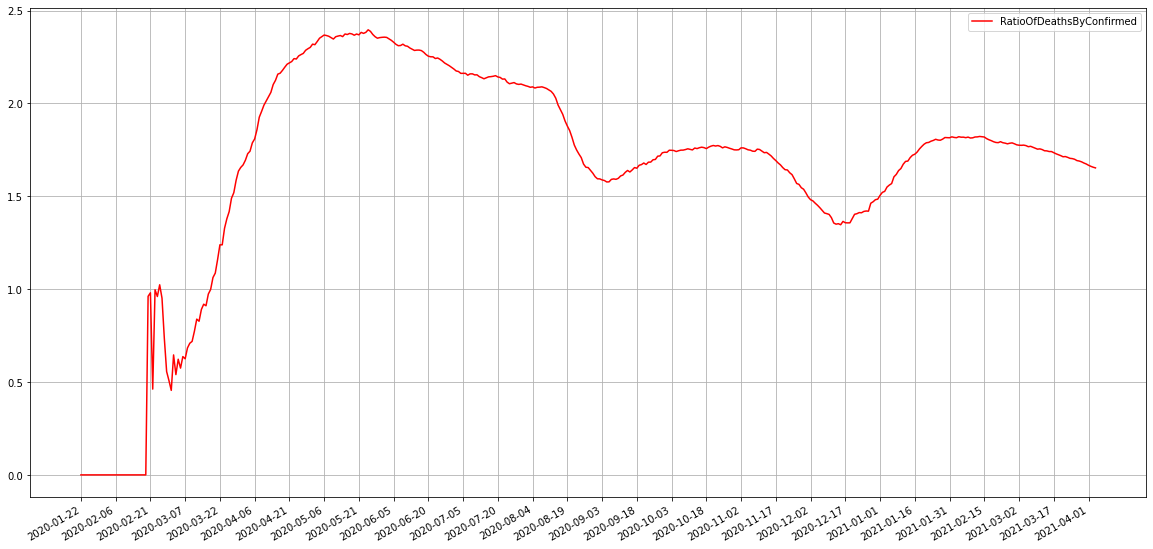

In [ ]:
# 사망율에 관한 그래프
fig, axes4 = plt.subplots(figsize = (20,10))
axes4.plot(time_series_ratio['Date'],time_series_ratio['RatioOfDeaths'],color = 'red', label = 'RatioOfDeathsByConfirmed')
axes4.legend()
axes4.grid(True)
plt.xticks(np.arange(0,438,15))
fig.autofmt_xdate()
plt.show()

* Ratio Of Deaths  
확진자 대비 사망율에 대한 그래프로, 위와 동일한 시기에서 큰 폭으로 변화하고 있음을 확인할 수 있다. 다만 이 경우 감소하고 있음을 보이고 있는데, 이는 확진자가 급격히 증가했기 때문에 일어난 현상이라고 분석할 수 있다.

## 2.2 **거리두기 정책 데이터**

In [ ]:
policy = pd.read_csv('/content/Policy.csv')

In [ ]:
print(policy.shape, len(policy.policy_id.unique())) 

(48, 7) 48


In [ ]:
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [ ]:
policy['gov_policy'].unique()

array(['Infectious Disease Alert Level', 'Special Immigration Procedure',
       'Mandatory 14-day Self-Quarantine',
       'Mandatory Self-Quarantine & Diagonostic Tests',
       'Emergency Use Authorization of Diagnostic Kit',
       'Drive-Through Screening Center', 'Mask Distribution',
       'Social Distancing Campaign', 'Thanks to Challenge korea',
       'School Closure', 'School Opening Delay',
       'School Opening with Online Class', 'Open Data ', 'Open API',
       'Self-Diagnosis App', 'Self-Quarantine Safety Protection App',
       'Electronic Wristbands'], dtype=object)

In [ ]:
policy.loc[[28,29,30]]

,policy_id,country,type,gov_policy,detail,start_date,end_date
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-05
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-04-06,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05


In [ ]:
for i in range (28,31):
  if policy.loc[i,'detail'] =='Strong':
    policy.loc[i,'detail'] = 2
  else:
    policy.loc[i,'detail'] = 1
    
policy['Level'] = policy['detail']

In [ ]:
policy = policy.loc[28:30, ['gov_policy', 'Level', 'start_date', 'end_date']]

In [ ]:
policy.reset_index(drop =True)

,gov_policy,Level,start_date,end_date
0,Social Distancing Campaign,2,2020-03-22,2020-04-05
1,Social Distancing Campaign,2,2020-04-06,2020-04-19
2,Social Distancing Campaign,1,2020-04-20,2020-05-05


In [ ]:
policy.loc[3] = [ 'Distancing in daily life', 1 , '2020-05-06', '2020-06-27'] # 생활속 거리두기 20.5.6-20.6.27
policy.loc[4] = [ 'Social Distancing Campaign', 1, '2020-06-28', '2020-08-15'] # 단계별 적응 - 1단계 거리두기 20.6.28-20.8.15
policy.loc[5] = [ 'Social Distancing Campaign', 2, '2020-08-16', '2020-08-29'] # 2단계 거리두기 20.8.16-20.8.29/ 8월 19일부터터터 완전한 거리두기
policy.loc[6] = [ 'Social Distancing Campaign', 2.5, '2020-08-30', '2020-09-13'] # 강화 2단계 거리두기 20.8.30-20.9.13
policy.loc[7] = [ 'Social Distancing Campaign', 2, '2020-09-14', '2020-10-11'] # 2단계 거리두기 20.9.14-20.10.11
policy.loc[8] = [ 'Social Distancing Campaign', 1, '2020-10-12', '2020-11-18'] # 1단계 거리두기 20.10.12-20.11.23
policy.loc[9] = [ 'Social Distancing Campaign', 1.5, '2020-11-19', '2020-11-23']
policy.loc[10] = [ 'Social Distancing Campaign', 2, '2020-11-24', '2020-12-07'] # 2단계 거리두기 20.11.24-20.12.07
policy.loc[11] = [ 'Social Distancing Campaign', 2.5, '2020-12-08', '2020-12-23'] # 2단계 거리두기 20.12.8-20.12.23 수도권은 2.5 비수도권 2
# policy.loc[12] = [ 'Special Measures for Strengthening the Prevention of the Year-end and New Year' , '2020-12-24', '2021-04-11'] # 연말연시 방역강화 특별대책 20.12.24-
policy.loc[12] = [ 'Social Distancing Campaign', 2.5, '2020-12-24', '2021-01-03'] # 5인이상 집합금지 시작
policy.loc[13] = [ 'Social Distancing Campaign', 2.5, '2021-01-04', '2021-01-17'] 
policy.loc[14] = [ 'Social Distancing Campaign', 2.5, '2021-01-18', '2021-01-31']
policy.loc[15] = [ 'Social Distancing Campaign', 2.5, '2021-02-01', '2021-02-14']
policy.loc[16] = [ 'Social Distancing Campaign', 2, '2021-02-15', '2021-02-28'] 
policy.loc[17] = [ 'Social Distancing Campaign', 2, '2021-03-01', '2021-04-11']

In [ ]:
policy.reset_index(drop =True)

,gov_policy,Level,start_date,end_date
0,Social Distancing Campaign,2,2020-03-22,2020-04-05
1,Social Distancing Campaign,2,2020-04-06,2020-04-19
2,Social Distancing Campaign,1,2020-04-20,2020-05-05
3,Distancing in daily life,1,2020-05-06,2020-06-27
4,Social Distancing Campaign,1,2020-06-28,2020-08-15
5,Social Distancing Campaign,2,2020-08-16,2020-08-29
6,Social Distancing Campaign,2.5,2020-08-30,2020-09-13
7,Social Distancing Campaign,2,2020-09-14,2020-10-11
8,Social Distancing Campaign,1,2020-10-12,2020-11-18
9,Social Distancing Campaign,1.5,2020-11-19,2020-11-23


In [ ]:
policy = policy.reset_index(drop =True)

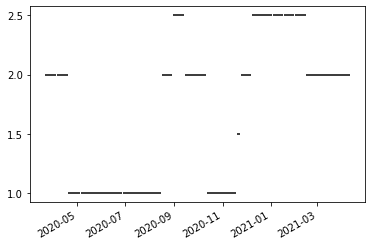

In [ ]:
start_date = pd.to_datetime(policy.start_date)
end_date = pd.to_datetime(policy.end_date)

fig = plt.figure()
ax = fig.add_subplot(111)
ax = ax.xaxis_date()
plt.yticks([1, 1.5, 2, 2.5])
ax = plt.hlines(policy['Level'], dt.date2num(start_date), dt.date2num(end_date))
fig.autofmt_xdate()

In [ ]:
xlabel = []
xlabel.append(policy.loc[0,'start_date'])
for i in range (len(policy['Level'])-1):
  if policy.loc[i,'Level'] != policy.loc[i+1,'Level']:
    xlabel.append(policy.loc[i,'end_date'])
xlabel.append(policy.loc[len(policy['Level'])-1,'end_date'])

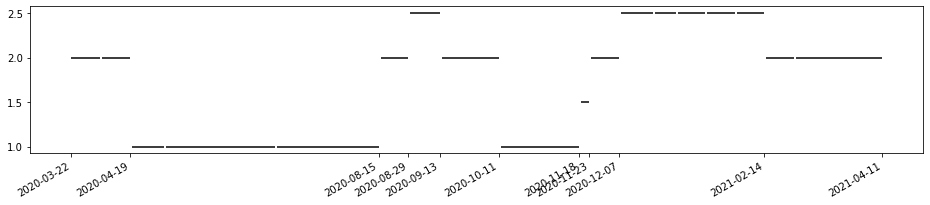

In [ ]:
fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(111)
ax = ax.xaxis_date()
xlabel = pd.to_datetime(xlabel)
plt.xticks(xlabel)
plt.yticks([1, 1.5, 2, 2.5])
ax = plt.hlines(policy['Level'], dt.date2num(start_date), dt.date2num(end_date))
fig.autofmt_xdate()

## 2.3 거리두기 정책 효과 확인


### 2.3.1 2020.04월까지

DACON의 데이터는 2020년 1월부터 4월까지의 확진자 데이터를 포함하고 있습니다.
<br><br>
1월에서 4월까지는 총 3번의 거리두기 정책이 시행되었으며 각각 2단계, 2단계, 1단계 수준의 거리두기 정책이였습니다.  
각각 거리두기 정책에 따라 확진자 수가 감소하는 양상을 보였습니다.


In [ ]:
# DACON patientInfo 데이터
patient_info = pd.read_csv('/content/PatientInfo.csv')

In [ ]:
# 결측치 개수 확인
print('province null count: ', patient_info['province'].isnull().sum())
print('confirmed_date null count', patient_info['confirmed_date'].isnull().sum())

province null count:  0
confirmed_date null count 3


In [ ]:
# confirmed_date에 Null 값이 있는 3 row 데이터 삭제
patient_info.dropna(subset=['confirmed_date'], inplace=True)

In [ ]:
def extract_by_date(df, date, name_column):
  start, end = date
  mask = (start <= df[name_column]) & (df[name_column]<=end)

  ds = list(map(int, date[0].split('-')))
  de = list(map(int, date[1].split('-')))
  date = pd.Timestamp(de[0], de[1], de[2]) - pd.Timestamp(ds[0], ds[1], ds[2])

  return df.loc[mask]

def count_days(df, name_column):
  ds = pd.to_datetime(min(df[name_column]), format='%Y-%m-%d')
  de = pd.to_datetime(max(df[name_column]), format='%Y-%m-%d')
  date = de - ds

  return date.days

In [ ]:
# 기존 DACON의 policy 데이터에 있던 거리두기 정책 3개에 대한 확진자 dataframe 생성
df_campaign1 = extract_by_date(patient_info, [policy.loc[0]['start_date'], policy.loc[0]['end_date']], 'confirmed_date')
df_campaign2 = extract_by_date(patient_info, [policy.loc[1]['start_date'], policy.loc[1]['end_date']], 'confirmed_date')
df_campaign3 = extract_by_date(patient_info, [policy.loc[2]['start_date'], policy.loc[2]['end_date']], 'confirmed_date')

In [ ]:
# 정책 기간 경과에 따른 확진자 수를 계산한 dataframe 생성
df_campaign1_count = df_campaign1.groupby(['confirmed_date']).size().reset_index(name='campaign1')
df_campaign2_count = df_campaign2.groupby(['confirmed_date']).size().reset_index(name='campaign2')
df_campaign3_count = df_campaign3.groupby(['confirmed_date']).size().reset_index(name='campaign3')

In [ ]:
# 시각화를 위해 하나의 dataframe으로 합함
df_campaign = pd.concat([df_campaign1_count['campaign1'], df_campaign2_count['campaign2'], df_campaign3_count['campaign3']], axis=1)

In [ ]:
fig = go.Figure()
date = [i for i in range(0, 15)]
fig.add_trace(go.Scatter(x=date, y=df_campaign1_count['campaign1'].values, name='03-22 ~ 04-05 (strong)'))
fig.add_trace(go.Scatter(x=date, y=df_campaign2_count['campaign2'].values, name='04-06 ~ 04-19 (strong)'))
fig.add_trace(go.Scatter(x=date, y=df_campaign3_count['campaign3'].values, name='04-20 ~ 05-05 (weak)'))
fig.update_layout(title='2월부터 4월까지 시행된 거리 두기 정책에 따른 확진자 수',
                  title_x=0.17,
                  xaxis_title='정책 시행 후 경과일',
                  yaxis_title='추가 확진자 수')
fig.show()

첫 2주간 실행된 2단계 거리두기에서는 초반 9일간은 확진자 수 상승세를 보이다 10일부터 급격히 줄어듬을 볼 수 있습니다.  
이후 연장된 2단계 거리두기 정책에서는 꾸준히 확진자가 줄어듬을 볼 수 있으며 약화된 1단계 거리두기 정책시기에도 확진자 수가 줄어듬을 볼 수 있습니다.

In [ ]:
day_campaign1 = count_days(df_campaign1_count, 'confirmed_date')
day_campaign2 = count_days(df_campaign2_count, 'confirmed_date')
day_campaign3 = count_days(df_campaign3_count, 'confirmed_date')

In [ ]:
df_campaign = df_campaign.sum().div([day_campaign1, day_campaign2, day_campaign3]).to_frame()

In [ ]:
campaign_name=['03-22 ~ 04-05 (strong)', '04-06 ~ 04-19 (strong)', '04-20 ~ 05-05 (weak)']
counts = [round(i, 2) for i in df_campaign.T.values[0]]
colors = px.colors.qualitative.Plotly[:3]
fig = go.Figure([go.Bar(x=campaign_name, y=counts,
                        text=counts, textposition='auto',
                        marker_color=colors)])
fig.update_layout(title='2월부터 4월까지 시행된 거리 두기 정책에 따른 1일 당 추가 확진자 수',
                  title_x=0.17,
                  xaxis_title='시행 정책 기간 및 강도',
                  yaxis_title='1일 당 추가 확진자 수')
fig.show()

거리두기 정책 기간이 모두 같지는 않아 1일 당 확진자 수 평균을 확인해본 결과 거리두기 시행에 따라 확진자 수가 줄어듬을 확인할 수 있습니다.  
이로서 4월까지의 거리두기 정책은 효과적이였다 볼 수 있습니다.

### 2.3.2 2020.12월까지
DACON 데이터로는 거리두기 정책의 효과를 약 2달만 확인할 수 있습니다.
<br><br>
2020년 하반기에는 코로나 확산 정도가 심해지며 정부의 거리두기 정책이 세분화되며 전국적 유행 단계인 2.5단계를 시행하기에 이릅니다.  
DACON의 데이터만으로는 하반기의 거리두기 단계에 따른 정책의 효율성을 볼 수 없어 서울 열린 데이터 광장의 **서울시 코로나 19 확진자 현황** 데이터와 kaggle의 **Real-time Covid 19 Data**를 추가 확보하여 정책의 효율성을 파악해보았습니다.

In [ ]:
patient_seoul = pd.read_csv('/content/서울시 코로나19 확진자 현황.csv', encoding='utf-8')

In [ ]:
# 확진일에 결측치가 없어 결측치 처리는 하지 않았습니다
patient_seoul.isnull().sum()

연번          0
확진일         0
환자번호    33197
국적      33197
환자정보    33197
지역          0
여행력     32173
접촉력         0
조치사항    33197
상태       2365
이동경로    33197
등록일         0
수정일         0
노출여부        0
dtype: int64

In [ ]:
list_campaigns = list()
list_names = list()
list_days = list()

# policy dataframe의 기간을 이용해 campaign 별 확진자 dataframe 생성 
for index, campaign in enumerate(policy.iterrows()):
  list_names.append(campaign[1]['start_date'] + ' ~ ' + campaign[1]['end_date'] + '(level : ' + str(campaign[1]['Level']) + ')')

  campaign = extract_by_date(patient_seoul, [campaign[1]['start_date'], campaign[1]['end_date']], '확진일')
  campaign = campaign.groupby(['확진일']).size().reset_index(name='count'+str(index))

  list_campaigns.append(campaign)
  list_days.append(count_days(campaign, '확진일'))

In [ ]:
df_campaign = pd.concat([campaign['count'+str(index)] for index, campaign in enumerate(list_campaigns)], axis=1)

In [ ]:
df_campaign = pd.DataFrame({'sum': df_campaign.sum(), 
                            'a day': df_campaign.sum().div(list_days)})

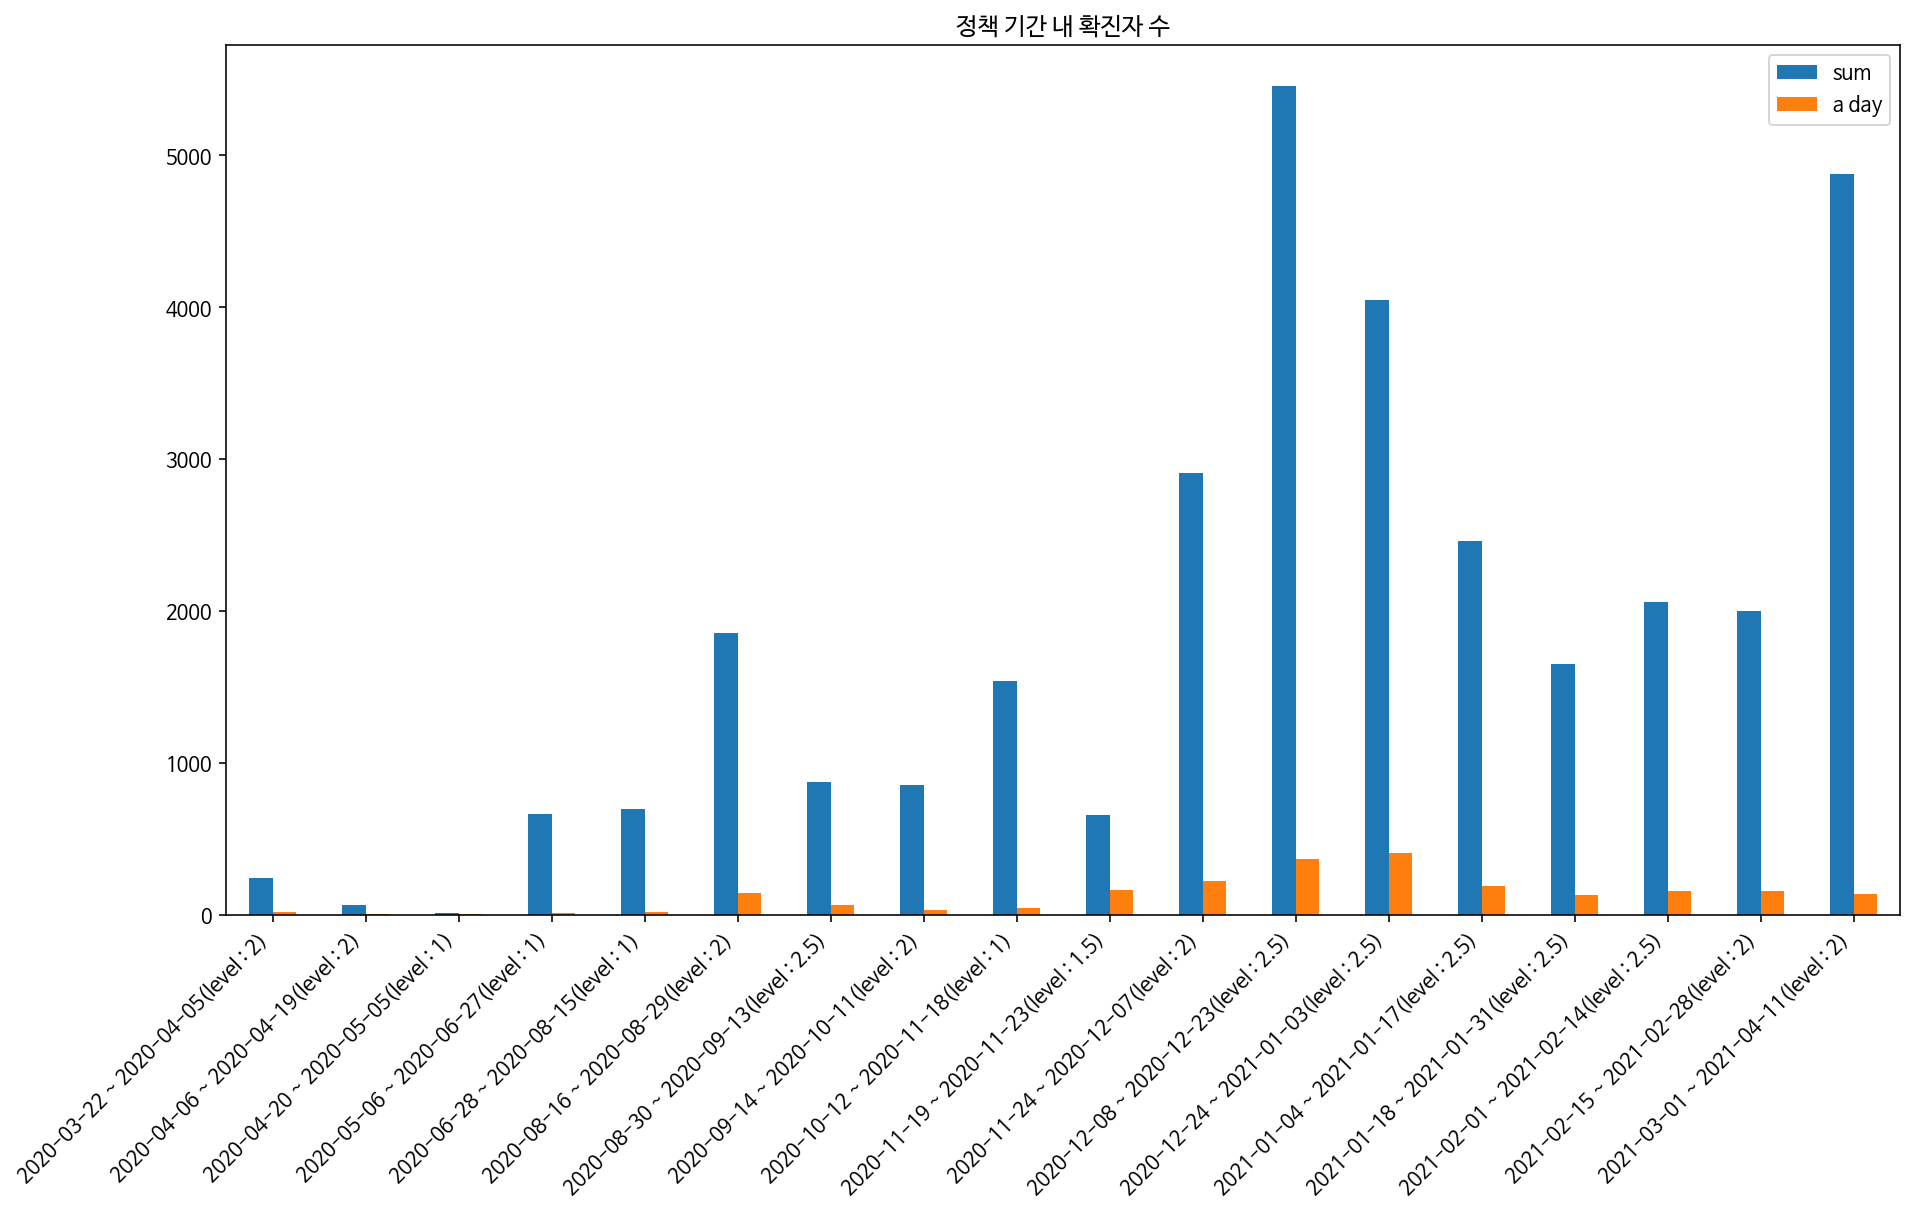

In [ ]:
df_campaign.plot(kind='bar', title='정책 기간 내 확진자 수')
plt.xticks(range(0, len(list_names)), list_names, rotation=45, horizontalalignment='right', fontsize='10')
plt.show()

sum(파란색)의 경우 해당 정책 기간 동안 추가 확진된 확진자 수의 총합을 의미하며, a day(주황색)은 해당 정책 기간 동안 발생한 확진자 수를 정책 기간으로 나누어 1일 당 추가 확진된 확진자 수를 의미합니다.  
a day를 기준으로 보았을 때 거리두기 2단계에서 1단계로 바꾸면 확진자수가 바로 늘어남을 볼 수 있습니다.  
(2020-08-15 이후 확진자 증가, 2020-11-18 이후 확진자 증가로 거리 두기 정책 단계 강화 시행)  

In [ ]:
xlabel_new = xlabel.fillna(0)

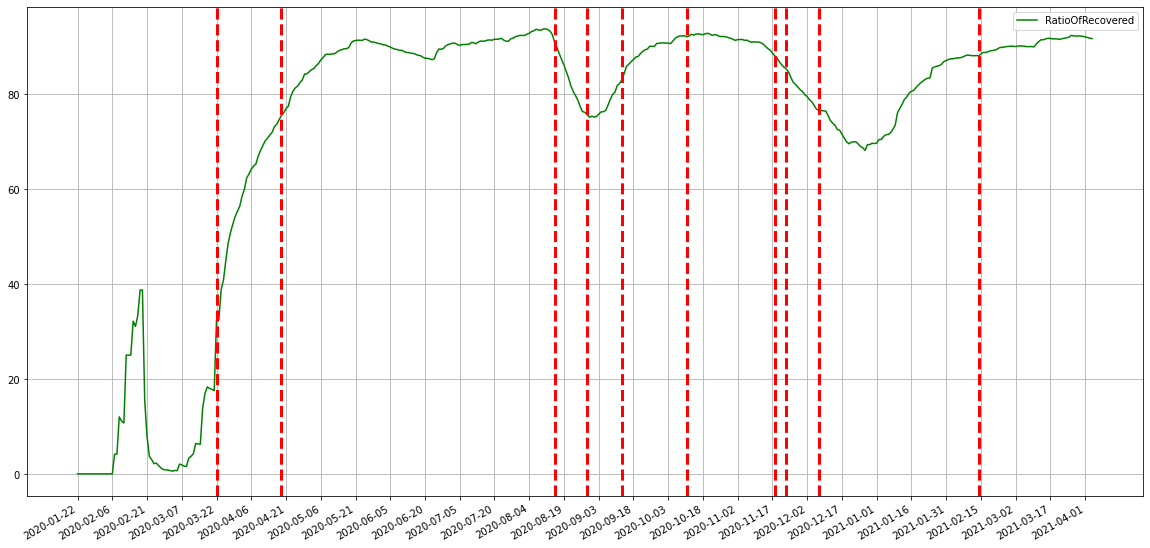

In [ ]:
# 회복율에 관한 그래프
fig, axes3 = plt.subplots(figsize = (20,10))
axes3.plot(time_series_ratio['Date'],time_series_ratio['RatioOfRecovered'],color = 'green', label = 'RatioOfRecovered')
axes3.legend()
axes3.grid(True)
for i in xlabel_new:
  if i != 0:
    for j in time_series_ratio['Date']:
      if i == pd.to_datetime(j):
        plt.axvline(x=j, color='r', linestyle='--', linewidth=3)
plt.xticks(np.arange(0,438,15))
fig.autofmt_xdate()
plt.show()

#3. 모빌리티 보고서 분석

앞에서 살펴본 정책이 사람들에게 영향을 미쳤는지 코로나19 지역사회 이동성 데이터를 통해서 확인해보고자 한다. 2020년 모빌리티 증감추이를 확인할 수 있다. 해당 데이터는 서울 기준(Seoul Metropolitan)으로 작성하였다. 데이터에서 NaN값이 증감률에는 존재하지 않으므로 전처리를 할 필요는 없다고 판단했다. 날짜별로 데이터를 선 형태로 증감률을 표현하기로 결정하였고, 이를 한 눈에 볼 수 있도록 2020년 자료를 구성했다.

In [5]:
google_2020_df = pd.read_csv("/content/2020_KR_Region_Mobility_Report.csv")
google_2021_df = pd.read_csv("/content/2021_KR_Region_Mobility_Report.csv")
print(google_2020_df.shape)
display(google_2020_df.head())

(642, 15)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-15,-4,0,3,-6,1,3
1,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-16,-11,0,-31,-15,-3,4
2,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-17,-7,-6,-17,-6,0,5
3,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-18,-1,-3,-5,-3,2,2
4,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-19,-5,-1,14,-4,1,2


해당 자료는 2020 년의 모빌리티 데이터이다. 자료의 시작을 보면 2020년 2월 15일부터이므로 이에 유의하여 데이터 전처리를 진행해야했다. 서울 데이터는 index가 321부터 시작됐기 때문에 이에 유의하여 시작 index를 잡아야 했다. 또한 행이 642인 이유는 서울과 외곽 도시를 나타내는 자료이기 때문이다. sub_region_1에서 서울 자료가 나오는 구간의 index는 321부터였기 이에 근거하여 전처리하였다.

In [ ]:
print(google_2021_df.shape)
display(google_2021_df.head())

(164, 15)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-01,-42,0,12,-46,-75,31
1,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-02,-34,1,-17,-34,-32,15
2,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-03,-35,3,-18,-32,-23,11
3,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-04,-18,7,3,-14,-10,9
4,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-05,-20,1,-12,-16,-11,8


해당 자료는 2021년 모빌리티 데이터이다. 2021년은 날짜가 진행중이므로 축적된 데이터가 비교적 짧다.

In [ ]:
# 특정 데이터 추출(2020년 2월 15일 ~ 2020년 12월 31일)

seoul_start_index = 321
# 날짜별 식당, 카페, 쇼핑센터, 놀이공원, 박물관, 도서관,영화관과 같은 장소에서 나타난 이동 추이
google_2020_df1 = google_2020_df.loc[seoul_start_index:, ['date','retail_and_recreation_percent_change_from_baseline']]

# 날짜별 식료품 매장, 식자재 창고, 농산물 시장, 전문 식품 매장, 드럭스토어, 약국과 같은 장소에서 나타난 이동 추이
google_2020_df2 = google_2020_df.loc[seoul_start_index:, ['date','grocery_and_pharmacy_percent_change_from_baseline']]

# 날짜별 국립공원, 공용 해수욕장, 정박지, 반려견 공원, 광장, 공공 정원과 같은 장소에서 나타난 이동 추이
google_2020_df3 = google_2020_df.loc[seoul_start_index:, ['date','parks_percent_change_from_baseline']]

# 날짜별 지하철, 버스, 기차역 등의 대중교통 허브와 같은 장소 에서 나타난 이동 추이
google_2020_df4 = google_2020_df.loc[seoul_start_index:, ['date','transit_stations_percent_change_from_baseline']]

# 날짜별 직장에서 나타난 이동 추이
google_2020_df5 = google_2020_df.loc[seoul_start_index:, ['date','workplaces_percent_change_from_baseline']]

# 날짜별 거주지에서 나타난 이동 추이
google_2020_df6 = google_2020_df.loc[seoul_start_index:, ['date','residential_percent_change_from_baseline']]

따라서 위처럼 전처리하였다. 특히 소상공인과 가장 밀접한 관련이 있는 식당, 카페 데이터를 포함해 아래와 같이 정리했다.<br>
- retail_and_recreation : **식당, 카페 데이터**
- grocery_and_pharamacy : 식료품 매장, 식자재 창고, 농산물 시장 데이터
- transit_stations : 지하철, 버스, 기차역 데이터
- workplaces : 직장 데이터
- residential : 거주지 근처 데이터

<Figure size 432x288 with 0 Axes>

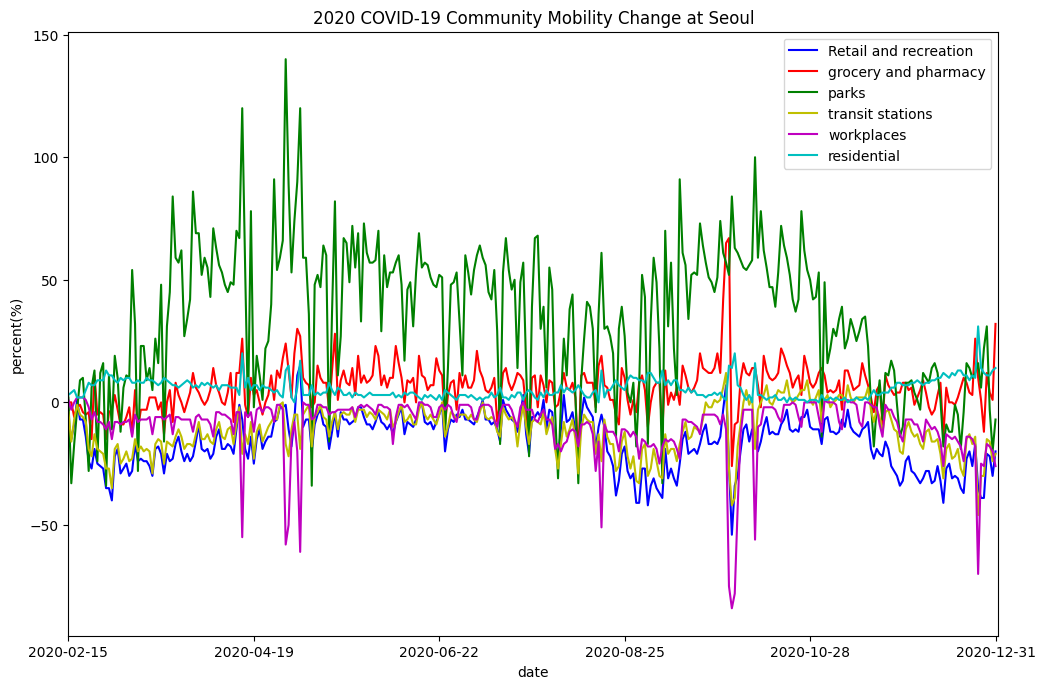

In [ ]:
# 모든 데이터 legend 처리 후 시각화

fig = plt.figure()
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k') # figure 크기 변경
ax = fig.add_subplot(1,1,1)
ax.plot(
    google_2020_df1['date'], google_2020_df1['retail_and_recreation_percent_change_from_baseline'], 'b-'
       )

ax.plot(
    google_2020_df2['date'], google_2020_df2['grocery_and_pharmacy_percent_change_from_baseline'], 'r-'
       )

ax.plot(
    google_2020_df3['date'], google_2020_df3['parks_percent_change_from_baseline'], 'g-'
       )

ax.plot(
    google_2020_df4['date'], google_2020_df4['transit_stations_percent_change_from_baseline'], 'y-'
       )

ax.plot(
    google_2020_df5['date'], google_2020_df5['workplaces_percent_change_from_baseline'], 'm'
       )

ax.plot(
    google_2020_df6['date'], google_2020_df6['residential_percent_change_from_baseline'], 'c'
       )

ax.set_title('2020 COVID-19 Community Mobility Change at Seoul')
ax.set_xlabel('date')
ax.set_ylabel('percent(%)')
plt.legend(['Retail and recreation', 'grocery and pharmacy', 'parks', 'transit stations', 'workplaces', 'residential'])
plt.xlim([0, seoul_start_index])
plt.xticks(np.arange(0, seoul_start_index, int(seoul_start_index/5)))
plt.show()

불필요한 데이터 빼기 / 가시성을 헤친다. 필요한 것만 합쳐서 보여주자. 경향성을 띄는 데이터만

In [ ]:
# 특정 데이터 추출(2021년 1월 1일 ~ 2021년 3월 23일)

seoul_start_index = 82
# 날짜별 식당, 카페, 쇼핑센터, 놀이공원, 박물관, 도서관,영화관과 같은 장소에서 나타난 이동 추이
google_2021_df1 = google_2021_df.loc[seoul_start_index:, ['date','retail_and_recreation_percent_change_from_baseline']]

# 날짜별 식료품 매장, 식자재 창고, 농산물 시장, 전문 식품 매장, 드럭스토어, 약국과 같은 장소에서 나타난 이동 추이
google_2021_df2 = google_2021_df.loc[seoul_start_index:, ['date','grocery_and_pharmacy_percent_change_from_baseline']]

# 날짜별 국립공원, 공용 해수욕장, 정박지, 반려견 공원, 광장, 공공 정원과 같은 장소에서 나타난 이동 추이
google_2021_df3 = google_2021_df.loc[seoul_start_index:, ['date','parks_percent_change_from_baseline']]

# 날짜별 지하철, 버스, 기차역 등의 대중교통 허브와 같은 장소 에서 나타난 이동 추이
google_2021_df4 = google_2021_df.loc[seoul_start_index:, ['date','transit_stations_percent_change_from_baseline']]

# 날짜별 직장에서 나타난 이동 추이
google_2021_df5 = google_2021_df.loc[seoul_start_index:, ['date','workplaces_percent_change_from_baseline']]

# 날짜별 거주지에서 나타난 이동 추이
google_2021_df6 = google_2021_df.loc[seoul_start_index:, ['date','residential_percent_change_from_baseline']]

<Figure size 432x288 with 0 Axes>

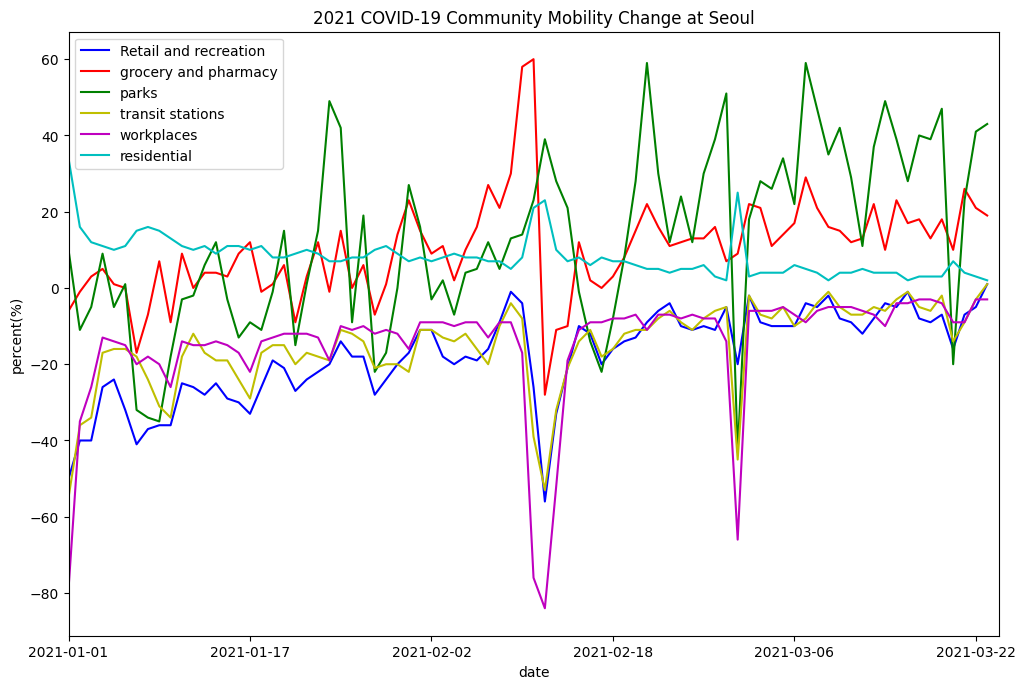

In [ ]:
# 모든 데이터 legend 처리 후 시각화

fig = plt.figure()
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k') # figure 크기 변경
ax = fig.add_subplot(1,1,1)
ax.plot(
    google_2021_df1['date'], google_2021_df1['retail_and_recreation_percent_change_from_baseline'], 'b-'
       )

ax.plot(
    google_2021_df2['date'], google_2021_df2['grocery_and_pharmacy_percent_change_from_baseline'], 'r-'
       )

ax.plot(
    google_2021_df3['date'], google_2021_df3['parks_percent_change_from_baseline'], 'g-'
       )

ax.plot(
    google_2021_df4['date'], google_2021_df4['transit_stations_percent_change_from_baseline'], 'y-'
       )

ax.plot(
    google_2021_df5['date'], google_2021_df5['workplaces_percent_change_from_baseline'], 'm'
       )

ax.plot(
    google_2021_df6['date'], google_2021_df6['residential_percent_change_from_baseline'], 'c'
       )

ax.set_title('2021 COVID-19 Community Mobility Change at Seoul')
ax.set_xlabel('date')
ax.set_ylabel('percent(%)')
plt.legend(['Retail and recreation', 'grocery and pharmacy', 'parks', 'transit stations', 'workplaces', 'residential'])
plt.xlim([0, seoul_start_index])
plt.xticks(np.arange(0, seoul_start_index, int(seoul_start_index/5)))
plt.show()

# 4. 코로나 전파로 인한 폐업
2020년 02월의 대구 신천지 사태, 2020년 05월의 이태원 클럽 집단 확진 사태, 2020년 08월의 사랑 제일 교회 사태로 사회적 거리두기 정책이 강화되었으며, 모빌리티 보고서에 따르면 유동 인구 또한 적어짐을 확인할 수 있었습니다.
<br><br>
해당 기간에는 집단 확진 사건들이 있었던 대구와 서울을 중심으로 유동 인구 감소로 인한 소상공인들의 경영 악화 문제가 수면 위로 드러났습니다.
<br><br>
2020, 2021년 대구와 서울의 음식점 폐업을 이전 년도들과 비교해 코로나로 인한 음식점 폐업 정도를 살펴보겠습니다.

## 4.1 대구

In [ ]:
patient_route = pd.read_csv('/content/PatientRoute.csv')

In [ ]:
pd.unique(patient_route['type'])

array(['airport', 'hospital', 'etc', 'store', 'public_transportation',
       'restaurant', 'church', 'beauty_salon', 'pharmacy', 'pc_cafe',
       'bank', 'cafe', 'bakery', 'bar', 'gym', 'school',
       'real_estate_agency', 'karaoke', 'post_office', 'gas_station',
       'lodging', 'academy', 'university', 'administrative_area_level_1'],
      dtype=object)

In [ ]:
query_food = "type in ['restaurant', 'bakery', 'bar']"
patient_food = patient_route.query(query_food)

In [ ]:
province_food = patient_food.groupby("province").count()
province_food

,patient_id,global_num,date,city,type,latitude,longitude
province,,,,,,,
Busan,64,0,64,64,64,64,64
Chungcheongbuk-do,9,0,9,9,9,9,9
Chungcheongnam-do,52,5,52,52,52,52,52
Daegu,12,4,12,12,12,12,12
Daejeon,5,1,5,5,5,5,5
Gangwon-do,30,3,30,30,30,30,30
Gwangju,20,20,20,20,20,20,20
Gyeonggi-do,25,14,25,25,25,25,25
Gyeongsangbuk-do,83,23,83,83,83,83,83


In [ ]:
closed_daegu = pd.read_csv('/content/음식점업태_대구.csv', encoding='utf-8')

In [ ]:
closed_daegu.isnull().sum()

인허가일자          0
폐업일자           0
소재지전체주소        0
도로명전체주소     1405
사업장명           0
좌표정보(x)      187
좌표정보(y)      187
위생업태명          1
영업장주변구분명     588
다중이용업소여부       0
dtype: int64

In [ ]:
closed_daegu['폐업일자'] = pd.to_datetime(closed_daegu['폐업일자'], format='%Y%m%d')

In [ ]:
closed_daegu = closed_daegu[(closed_daegu['폐업일자'] >= '2016-01-01') & (closed_daegu['폐업일자'] < '2021-01-01')]

In [ ]:
closed_year = closed_daegu.resample('YS', on='폐업일자').count()
closed_year

,인허가일자,폐업일자,소재지전체주소,도로명전체주소,사업장명,좌표정보(x),좌표정보(y),위생업태명,영업장주변구분명,다중이용업소여부
폐업일자,,,,,,,,,,
2016-01-01,123,123,123,122,123,123,123,123,101,123
2017-01-01,121,121,121,119,121,121,121,121,98,121
2018-01-01,102,102,102,102,102,102,102,101,82,102
2019-01-01,93,93,93,93,93,93,93,93,74,93
2020-01-01,88,88,88,88,88,88,88,88,69,88


[]

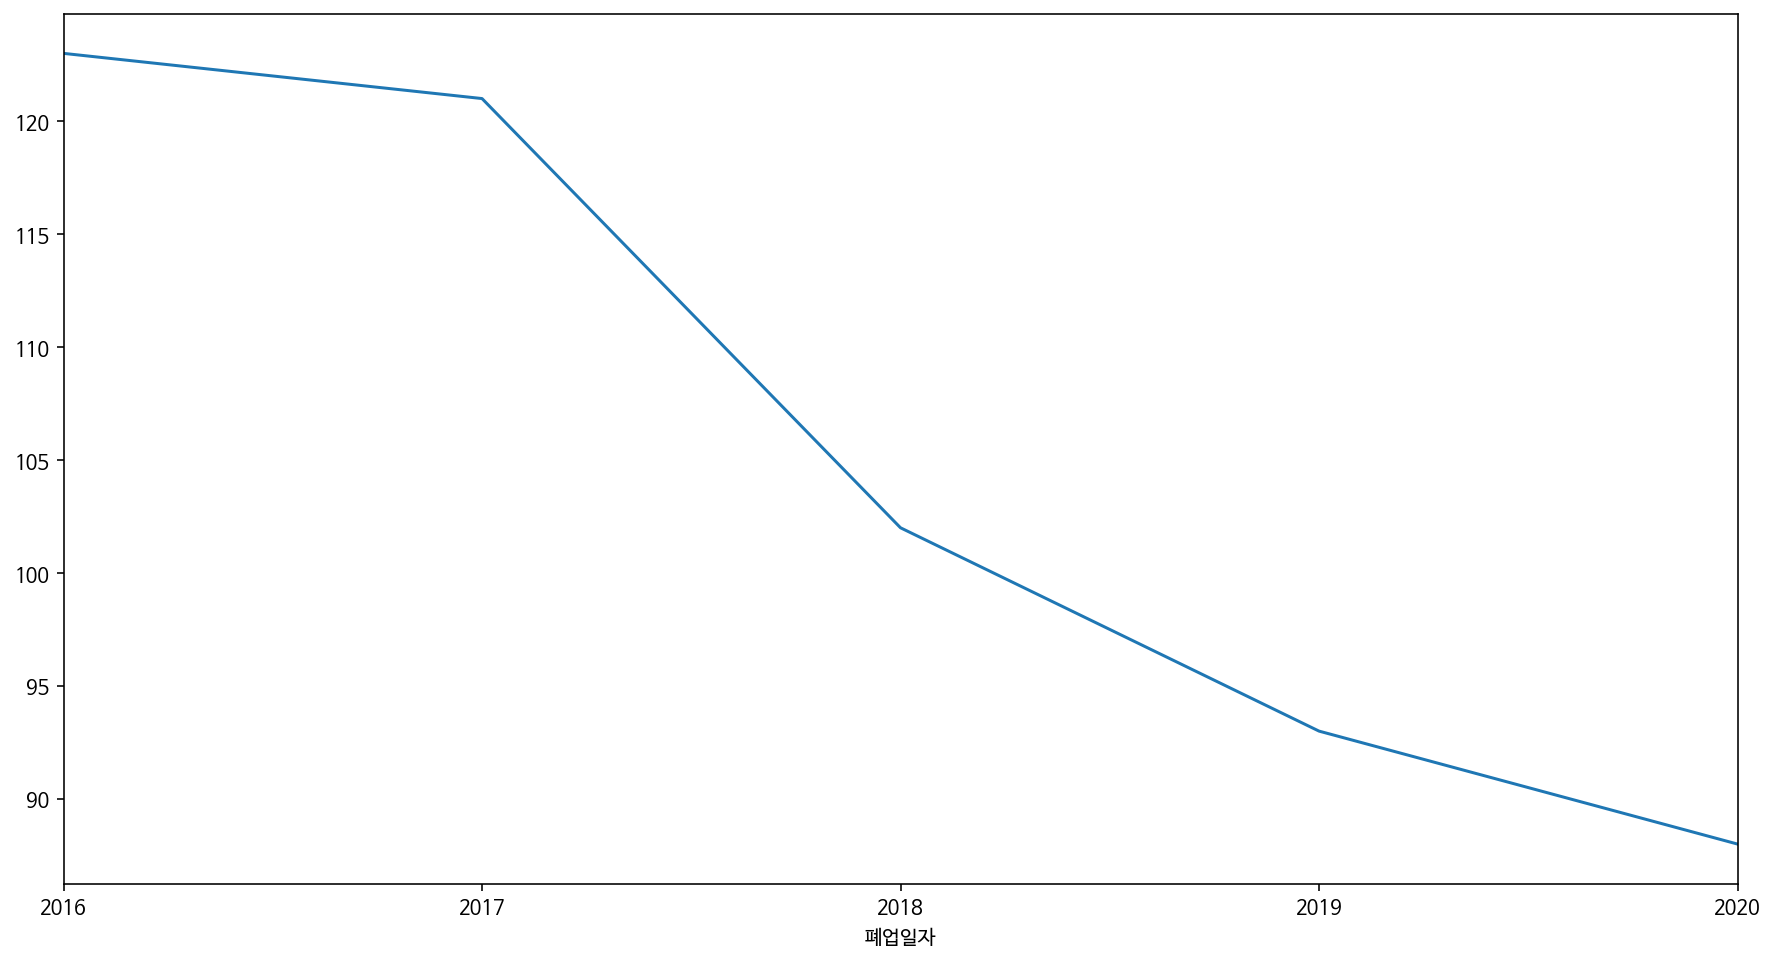

In [ ]:
closed_year['인허가일자'].plot()
plt.plot()

In [ ]:
closed_month_2016 = closed_daegu[closed_daegu['폐업일자'].dt.year == 2016]
closed_month_2017 = closed_daegu[closed_daegu['폐업일자'].dt.year == 2017]
closed_month_2018 = closed_daegu[closed_daegu['폐업일자'].dt.year == 2018]
closed_month_2019 = closed_daegu[closed_daegu['폐업일자'].dt.year == 2019]
closed_month_2020 = closed_daegu[closed_daegu['폐업일자'].dt.year == 2020]

In [ ]:
closed_month_2016 = closed_month_2016.resample('MS', on='폐업일자').count()
closed_month_2017 = closed_month_2017.resample('MS', on='폐업일자').count()
closed_month_2018 = closed_month_2018.resample('MS', on='폐업일자').count()
closed_month_2019 = closed_month_2019.resample('MS', on='폐업일자').count()
closed_month_2020 = closed_month_2020.resample('MS', on='폐업일자').count()

In [ ]:
closed_month = pd.DataFrame({"2016":closed_month_2016['인허가일자'].values,
                             "2017":closed_month_2017['인허가일자'].values,
                             "2018":closed_month_2018['인허가일자'].values,
                             "2019":closed_month_2019['인허가일자'].values,
                             "2020":closed_month_2020['인허가일자'].values})
closed_month.index = [str(i)+'월' for i in range(1, 13)]

[]

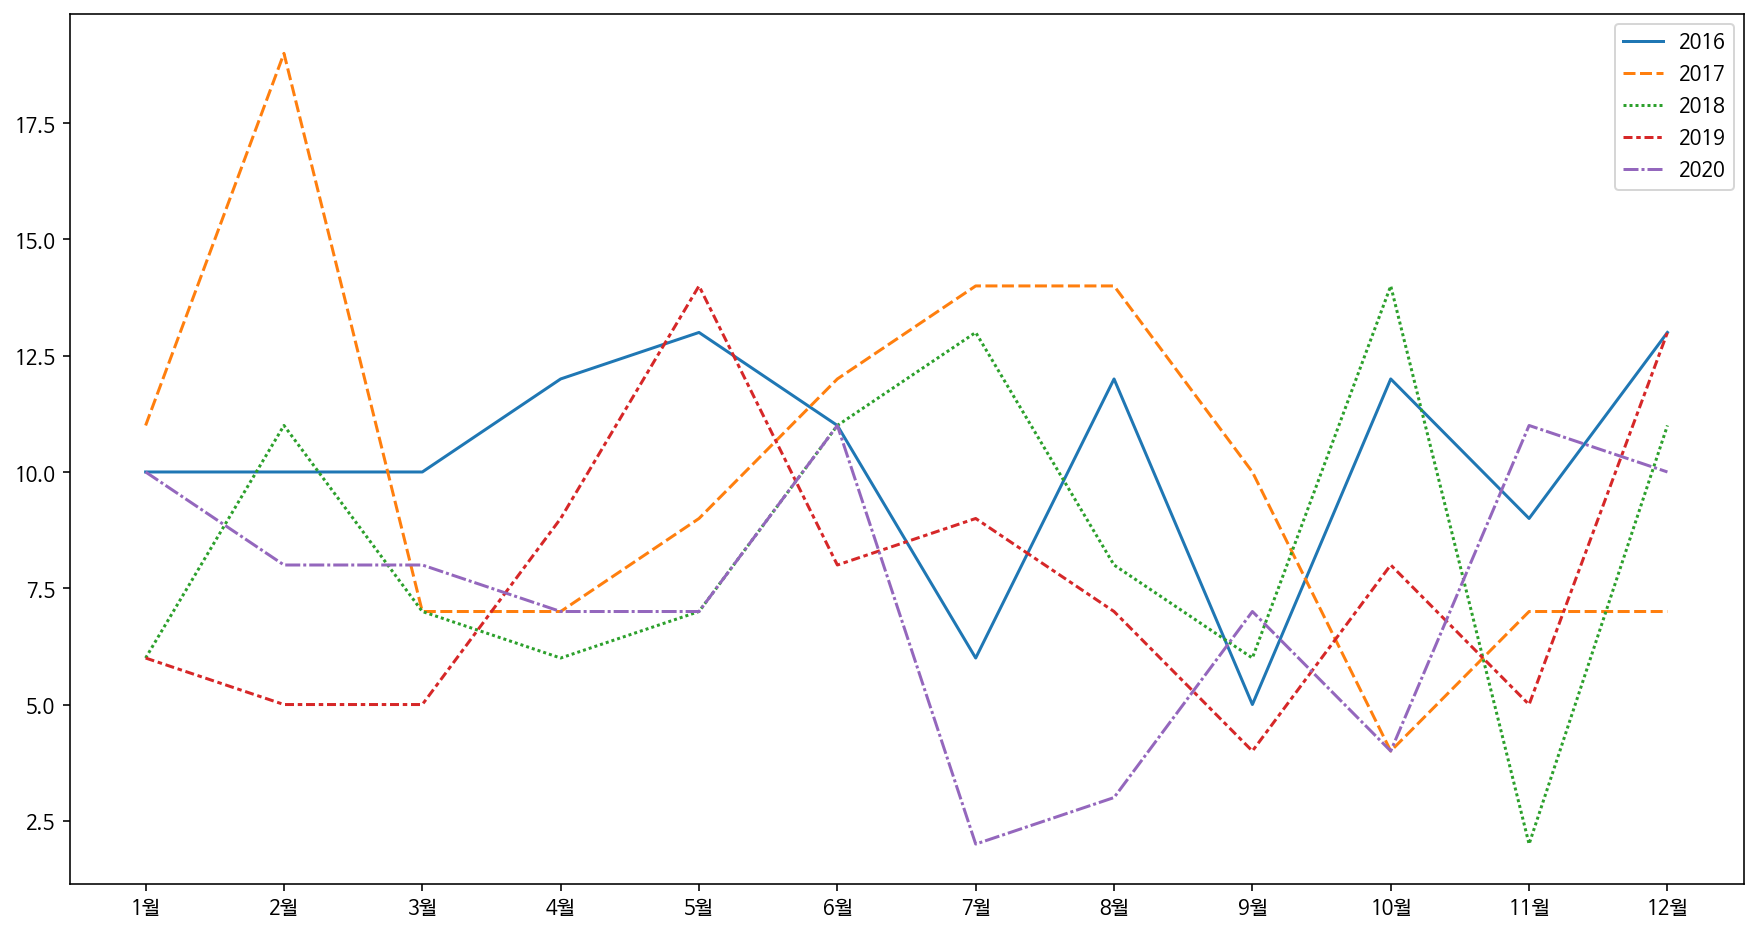

In [ ]:
sns.lineplot(data=closed_month)
plt.plot()

확진자 중 대구 음식점을 방문한 사람은 12명으로 다른 지역보다 작은 편이였습니다.  
방문 사람데이터와 상관 없이 대구 음식점 폐업 수를 통해 2020년 음식점 폐업 수가 많다면 코로나로 인한 폐업을 주장할 수 있을 텐데 년별, 월별로 비교한 결과 오히려 2020년의 폐업 수가 줄어듬을 볼 수 있습니다.


## 4.2 서울

In [ ]:
df_서울 = pd.read_csv("/content/음식점업태_서울.csv", encoding='utf-8')

df_서울.info()
print()
df_서울.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62480 entries, 0 to 62479
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   인허가일자     62480 non-null  int64  
 1   폐업일자      62480 non-null  int64  
 2   소재지전체주소   62471 non-null  object 
 3   도로명전체주소   13888 non-null  object 
 4   사업장명      62480 non-null  object 
 5   좌표정보(x)   62480 non-null  float64
 6   좌표정보(y)   62480 non-null  float64
 7   위생업태명     62480 non-null  object 
 8   영업장주변구분명  46352 non-null  object 
 9   다중이용업소여부  62480 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB



인허가일자           0
폐업일자            0
소재지전체주소         9
도로명전체주소     48592
사업장명            0
좌표정보(x)         0
좌표정보(y)         0
위생업태명           0
영업장주변구분명    16128
다중이용업소여부        0
dtype: int64

In [ ]:
df_서울['인허가일자'] = pd.to_datetime(df_서울['인허가일자'], format='%Y%m%d', errors = 'coerce') #날짜형식변환
df_서울['폐업일자'] = pd.to_datetime(df_서울['폐업일자'], format='%Y%m%d', errors = 'coerce') #날짜형식변환

df_서울.drop(df_서울[(df_서울['폐업일자'].dt.year > 2021)].index, inplace=True) # 폐업일자 오타로 추정됨 2021년 이후 지우기
df_서울.drop(df_서울[(df_서울['폐업일자'].dt.year < 2017)].index, inplace=True) # 2017년 이전 data drop
df_서울['연도'], df_서울['월'] = df_서울['폐업일자'].dt.year, df_서울['폐업일자'].dt.month

df_서울[['시도','시군구']] = df_서울['소재지전체주소'].str.split(' ', expand=True).iloc[:,[0,1]]

df_서울['영업기간'] = df_서울['폐업일자'] - df_서울['인허가일자']

df_서울 = df_서울.loc[:,['시도','시군구','위생업태명','폐업일자','연도','월','인허가일자','사업장명','소재지전체주소','영업기간','좌표정보(x)','좌표정보(y)']]

df_서울.drop(df_서울[df_서울['시도'].isnull() == True].index, inplace=True)


df_서울.head()
df_서울.tail()

,시도,시군구,위생업태명,폐업일자,연도,월,인허가일자,사업장명,소재지전체주소,영업기간,좌표정보(x),좌표정보(y)
62475,서울특별시,용산구,호프/통닭,2021-03-31,2021,3,2015-09-11,하나비,서울특별시 용산구 한강로2가 224-1 지상2층,2028 days,196993.2274,447261.1605
62476,서울특별시,중구,호프/통닭,2021-03-31,2021,3,2010-02-10,트레이지티브이,서울특별시 중구 태평로1가 60-15 1층,4067 days,197799.6010,451730.7722
62477,서울특별시,서대문구,한식,2021-03-31,2021,3,2008-04-04,원당감자탕,서울특별시 서대문구 충정로2가 99-12 (지상1층),4744 days,196804.5921,451359.1737
62478,서울특별시,서대문구,한식,2021-03-31,2021,3,1988-12-15,고삼이 2호점,서울특별시 서대문구 창천동 31-20,11794 days,194377.3073,450674.2359
62479,서울특별시,종로구,한식,2021-04-01,2021,4,2016-01-20,호질,서울특별시 종로구 통인동 135-4 지상2층,1898 days,197312.2294,453002.7877


In [ ]:
year5Y = df_서울[df_서울['폐업일자'].dt.date >= date(2017,1,1)]

In [ ]:
data = [dict(
  x = df_서울['폐업일자'],
  autobinx = False,
  autobiny = True,
  marker = dict(color = 'rgb(68, 68, 68)'),
  name = 'date',
  type = 'histogram',
  xbins = dict(
    end = '2021-04-01 12:00',
    size = 'D1',
    start = '2017-01-01 12:00'
  )
)]

layout = dict(
  paper_bgcolor = 'rgb(240, 240, 240)',
  plot_bgcolor = 'rgb(240, 240, 240)',
  title = '<b>2017~2021 폐업 수</b>',
  xaxis = dict(
    title = '',
    type = 'date'
  ),
  yaxis = dict(
    title = '폐업 수',
    type = 'linear'
  ),
  updatemenus = [dict(
        x = 0.1,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 0,
        showactive = True,
        buttons = [
        dict(
            args = ['xbins.size', 'D1'],
            label = 'Day',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M1'],
            label = 'Month',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M3'],
            label = 'Quater',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M6'],
            label = 'Half Year',
            method = 'restyle',
        ), dict(
            args = ['xbins.size', 'M12'],
            label = 'Year',
            method = 'restyle',
        )]
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

In [ ]:
# 분기별 추세를 살펴보면 소폭 감소하는 것을 알 수 있음
# 반기별 추세를 보면 아직 1/4밖에 지나지 않아 수치를 가산하더라도
# 앞 3년 대비 근 2년간은 음식점의 폐업수가 오히려 준 것을 볼 수 있음

In [ ]:
fig = go.Figure()

#####최근 6개월#####
fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2020) & (year5Y['월'] == 10), '영업기간'].dt.days,
                     name="2020년 10월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='rgb(7,40,89)',
                     line_color='#3D9970'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2020) & (year5Y['월'] == 11), '영업기간'].dt.days,
                     name="2020년 11월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='rgb(7,40,89)',
                     line_color='#3D9970'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2020) & (year5Y['월'] == 12), '영업기간'].dt.days,
                     name="2020년 12월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='rgb(7,40,89)',
                     line_color='#3D9970'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2021) & (year5Y['월'] == 1), '영업기간'].dt.days,
                     name="2021년 01월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='rgb(7,40,89)',
                     line_color='#FF4136'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2021) & (year5Y['월'] == 2), '영업기간'].dt.days,
                     name="2021년 02월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='rgb(7,40,89)',
                     line_color='#FF4136'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2021) & (year5Y['월'] == 3), '영업기간'].dt.days,
                     name="2021년 03월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='rgb(7,40,89)',
                     line_color='#FF4136'
                    )
             )

#####2019년 1~3월 대비 2020년 1~3월 대비 2021년 1~3월 #####
fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2019) & (year5Y['월'] == 1), '영업기간'].dt.days,
                     name="2019년 01월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='rgb(7,40,89)',
                     line_color='rgb(7,40,89)'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2020) & (year5Y['월'] == 1), '영업기간'].dt.days,
                     name="2020년 01월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='#FF4136',
                     line_color='#FF4136'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2021) & (year5Y['월'] == 1), '영업기간'].dt.days,
                     name="2021년 01월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color= 'rgb(7,40,89)',
                     line_color='#3D9970'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2019) & (year5Y['월'] == 2), '영업기간'].dt.days,
                     name="2019년 02월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='rgb(7,40,89)',
                     line_color='rgb(7,40,89)'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2020) & (year5Y['월'] == 2), '영업기간'].dt.days,
                     name="2020년 02월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='#FF4136',
                     line_color='#FF4136'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2021) & (year5Y['월'] == 2), '영업기간'].dt.days,
                     name="2021년 02월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color= 'rgb(7,40,89)',
                     line_color='#3D9970'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2019) & (year5Y['월'] == 3), '영업기간'].dt.days,
                     name="2019년 03월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='rgb(7,40,89)',
                     line_color='rgb(7,40,89)'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2020) & (year5Y['월'] == 3), '영업기간'].dt.days,
                     name="2020년 03월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color='#FF4136',
                     line_color='#FF4136'
                    )
             )

fig.add_trace(go.Box(x = year5Y.loc[(year5Y['연도'] == 2021) & (year5Y['월'] == 3), '영업기간'].dt.days,
                     name="2021년 03월",
                     jitter=0.3,
                     pointpos=-1.8,
                     boxpoints='suspectedoutliers',
                     marker_color= 'rgb(7,40,89)',
                     line_color='#3D9970'
                    )
             )


fig.update_layout(
    updatemenus=[
        dict(
            type = 'buttons',
            active=0,
            buttons=list([
                dict(label="최근 6개월",
                     method="update",
                     args=[{"visible": [True, True, True, True, True, True, False, False, False, False, False, False, False, False, False]},
                           {"title": "영업기간 Boxplot - 최근 6개월",
                            "annotations": []}]),
                
                dict(label="최근 3년 비교",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True, True, True, True, True, True, True, True, True ]},
                           {"title": "영업기간 Boxplot - 2019년 대비 2020년 대비 2021년",
                            "annotations": []}]),
            ]),
        )
    ])


fig.update_layout(height = 800,
                  title = dict(text = '영업기간 Boxplot', font = dict(size = 25))
                 )
fig.show()


In [ ]:
# 최근 6개월: 중앙값의 변화는 크게 일어나지 않았지만, 조금씩 영업기간이 긴 업체의 폐업이 늘어났다는 것을 알 수 있다
# 최근 3년 비교: 2019-2020년에는 폐업률이 감소했지만, 21년에는 소폭 증가했고, 특히 21년 3월이 전년의 같은 시점과
#             대비하여 늘었다는 것을 알 수 있다.

#5. 앱 사용량, 배달대행 분석
폐업에 대한 데이터를 분석해본 결과, 많은 소상공인들이 폐업할 것이라는 예상과는 달랐다. 그렇다면 왜 이러한 결과가 발생했을까?<br>
<br>
-> '왜 확인했나 명분이 필요함' 모빌리티 보고서 분석에 의하면 다른 유동성 그래프를 보았을 때 재택이나 거주지 상에서 어떻게 소비생활 ::
우리는 이유를 찾던 중 앱 사용량 데이터와 배달 대행 분석 데이터를 확인하며 근거를 찾을 수 있었다. // <앱사용량데이터> -> <가설검증>

In [ ]:
# 배달 앱, 배달 대행 사용량 데이터, 한글 사용을 위해 CP949 사용
app_agent_use_df = pd.read_csv("/content/2018-2020_delivery.csv", encoding='CP949')

In [ ]:
# 2018~2020 서울 데이터 전처리 후 추출
print(app_agent_use_df.shape)
display(app_agent_use_df.head())

(6, 6)


,Region,Year,Type,Usable(Y),Usable(N),Cost(Month)
0,Seoul,2018,App,5.6,94.4,256369.6
1,Seoul,2018,Agent,1.9,94.4,430653.5
2,Seoul,2019,App,9.7,90.3,338523.9
3,Seoul,2019,Agent,7.0,93.0,729198.3
4,Seoul,2020,App,19.9,80.1,729198.3


In [ ]:
app_use_usable = app_agent_use_df.loc[0:6:2, ['Year','Usable(Y)']]
app_use_cost = app_agent_use_df.loc[0:6:2, ['Year','Cost(Month)']]

agent_use_usable = app_agent_use_df.loc[1:6:2, ['Year','Usable(Y)']]
agent_use_cost = app_agent_use_df.loc[1:6:2, ['Year','Cost(Month)']]

display(app_use_usable.head())
display(app_use_cost.head())

display(agent_use_usable.head())
display(agent_use_cost.head())

,Year,Usable(Y)
0,2018,5.6
2,2019,9.7
4,2020,19.9


,Year,Cost(Month)
0,2018,256369.6
2,2019,338523.9
4,2020,729198.3


,Year,Usable(Y)
1,2018,1.9
3,2019,7.0
5,2020,16.8


,Year,Cost(Month)
1,2018,430653.5
3,2019,729198.3
5,2020,2808205.0


<Figure size 432x288 with 0 Axes>

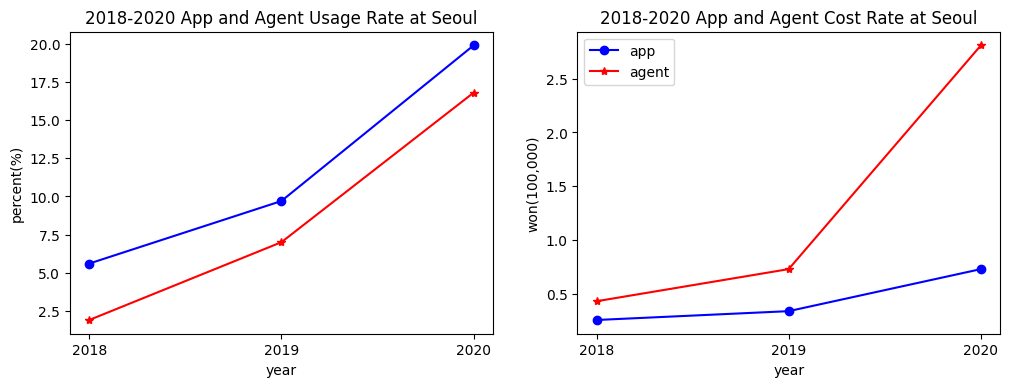

In [ ]:
# 데이터 시각화

fig = plt.figure()
fig = plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k') # figure 크기 변경
ax1 = fig.add_subplot(1,2,1)
ax1.plot(
    app_use_usable['Year'], app_use_usable['Usable(Y)'], 'bo-'
       )
ax1.plot(
    agent_use_usable['Year'], agent_use_usable['Usable(Y)'], 'r*-'
       )

ax1.set_title('2018-2020 App and Agent Usage Rate at Seoul')
ax1.set_xlabel('year')
ax1.set_ylabel('percent(%)')
plt.xticks(np.arange(2018, 2021))

ax2 = fig.add_subplot(1,2,2)
ax2.plot(
    app_use_cost['Year'], app_use_cost['Cost(Month)']/1e6, 'bo-'
       )
ax2.plot(
    agent_use_cost['Year'], agent_use_cost['Cost(Month)']/1e6, 'r*-'
       )

ax2.set_title('2018-2020 App and Agent Cost Rate at Seoul')
ax2.set_xlabel('year')
ax2.set_ylabel('won(100,000)')
plt.legend(['app', 'agent'])
plt.xticks(np.arange(2018, 2021))
plt.show()

# 6. 결론
~ 뉴스 데이터 / 참고해서 적기

# 7. 출처
- 도입부 기사 통계 뉴스 : https://biz.chosun.com/site/data/html_dir/2020/04/10/2020041003722.html?utm_source=urlcopy&utm_medium=share&utm_campaign=biz
- 배달앱 및 배달대행 이용현황 : https://kosis.kr/statHtml/statHtml.do?orgId=114&tblId=DT_114054_016
- 구글 모빌리티 이동 보고서 : https://www.google.com/covid19/mobility/